<a href="https://colab.research.google.com/github/OluPaul22/gis/blob/main/PS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify
!pip install adjustText

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis


import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from adjustText import adjust_text
from matplotlib.patheffects import withStroke #Import the withStroke object.

In [3]:
#!python --version
gpd.__version__

'1.0.1'

#PS 2

##Dr. Adam's comment
## could have gotten faster to the chase. Just focus on the key, best maps yeah what i found striking is that 30k med hh inc camden spends more on schools per kid than 180k med hh inc haddonfield. very good! nice story! Do scatterplot! perc disadvantaged v spending per pupil other states? not so much redistribution could add other var, like percent foreign born, race ethnicity in general dont put writeup as section headers; here not that bad as they are short

## get data on minimum household income, poverty rate (there is redistribution).

## In response to the comment above, in this PS 2, I narrowed the map down to just Camden County Unified School Districts (only 23 merged). I introduced three other variables (median household income, graduation rate, and percentage college enrollment), two of which are measures of academic outcome. After including these two variables, only 12 school districts merged.

* In subsequent problem sets, I aim to replicate this process for an additional state and incorporate recommended variables like foreign birth, race, and ethnicity, provided the data permits it.

In [4]:
#Camden County Map by Zip Codes
! wget -q -O CamCounty_ZipCode.zip https://docs.google.com/uc?id=1i9D-XX2kKX91PB_4hvxtV8nQWJwYD4Zx&export=download

zip_ref = zipfile.ZipFile('CamCounty_ZipCode.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
Camden=gpd.read_file('Zip_Codes.shp') #load the shapefile with gpd as njC


<Axes: >

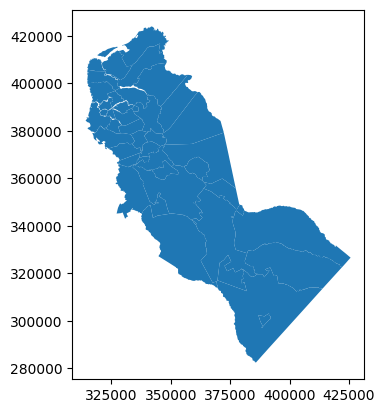

In [5]:
#make the map
Camden.plot()

In [6]:
! wget -q -O School_Districts_-_Unified_for_NJ%2C_3424.zip https://docs.google.com/uc?id=1gyj7YPk97WcCxU91ouoEb7cwenGe-k8h&export=download
zip_ref = zipfile.ZipFile('School_Districts_-_Unified_for_NJ%2C_3424.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_utscds=gpd.read_file('School_Districts_-_Unified_for_NJ%2C_3424.shp') #load the shapefile with gpd as njC



In [7]:
nj_utscds['NJDOE_ID_U'] = nj_utscds['NJDOE_ID_U'].str[3:]
nj_utscds['NJDOE_ID_U'] = nj_utscds['NJDOE_ID_U'].astype(int)

In [8]:
nj_utscds = nj_utscds.rename(columns={'NJDOE_ID_U': 'dist_code'}) ## to rename

njutscds=nj_utscds[['dist_code','DIST_NAME','GEOID','geometry']] ## keeping necessary variables


In [9]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

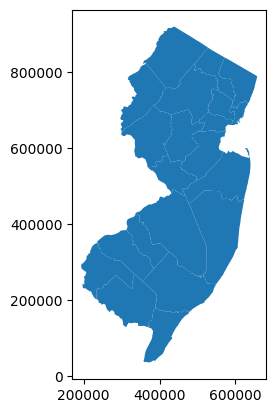

In [10]:
njC0.plot()

In [11]:
ppe=pd.read_stata('https://github.com/OluPaul22/data/blob/main/PPEDistrict.dta?raw=true')

In [12]:
ppe = ppe.rename(columns={'district_code': 'dist_code'}) ## changing the name
ppe['dist_code'] = ppe['dist_code'].astype(int) ## making district code an integer

In [13]:
#merge function
nj_ppe = pd.merge(njutscds, ppe, on='dist_code',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec to see what merges and what did not merge)
## 'outer' will keep all the variables either it merges or did not
nj_ppe[['dist_code','PPE','_merge']] #all good, NEW JERSEY expected not to merge

dist_code      PPE      _merge
0           10  24095.0        both
1           20  28588.0  right_only
2           30  24937.0        both
3           40  23966.0  right_only
4           50      NaN   left_only
..         ...      ...         ...
667       8010  14672.0  right_only
668       8050  31027.0  right_only
669       8060  29153.0  right_only
670       8065   2232.0  right_only
671       8140  21883.0  right_only

[672 rows x 3 columns]

In [14]:
#merge function
nj_ppe1 = pd.merge(njutscds, ppe, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [15]:

econ_dis = pd.read_stata('https://github.com/OluPaul22/data/blob/main/econ_disadv.dta?raw=true')


In [16]:
econ_dis = econ_dis.rename(columns={'district_code': 'dist_code'}) ## changing the name
econ_dis['dist_code'] = econ_dis['dist_code'].astype(int) ## making district code an integer

In [17]:
#merge function
econdis = pd.merge(nj_ppe1, econ_dis, on='dist_code',how='outer',indicator=True)
econdis[['dist_code','econ_dis','_merge']]

dist_code  econ_dis      _merge
0           10      38.7        both
1           20       5.2  right_only
2           30       6.2        both
3           40       2.3  right_only
4           60      14.3        both
..         ...       ...         ...
664       8010      84.6  right_only
665       8050      10.9  right_only
666       8060      64.1  right_only
667       8065      78.3  right_only
668       8140      73.9  right_only

[669 rows x 3 columns]

In [19]:
#merge function
econdis1 = pd.merge(nj_ppe1, econdis, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [20]:
econdis1.head(2)

dist_code                         DIST_NAME_x  GEOID_x  \
0       5805  Willingboro Public School District  3418000   
1       4920  South River Public School District  3415390   

                                          geometry_x  countyname  \
0  POLYGON ((386370.414 440959.026, 389173.931 44...  Burlington   
1  POLYGON ((524300.577 593657.109, 524249.62 593...   Middlesex   

      district_name  PPE_x    PPE_K_x                         DIST_NAME_y  \
0   Willingboro Twp  26449  26.448999  Willingboro Public School District   
1  South River Boro  21975  21.975000  South River Public School District   

   GEOID_y  ... countyname_x   district_name_x    PPE_y    PPE_K_y  \
0  3418000  ...   Burlington   Willingboro Twp  26449.0  26.448999   
1  3415390  ...    Middlesex  South River Boro  21975.0  21.975000   

   countyname_y                     district_name_y econ_dis  female  male  \
0    Burlington  Willingboro Public School District     56.3    41.0  59.0   
1     Middlesex  South River Public School District     28.5    50.0  50.0   

   _merge  
0    both  
1    both  

[2 rows x 21 columns]

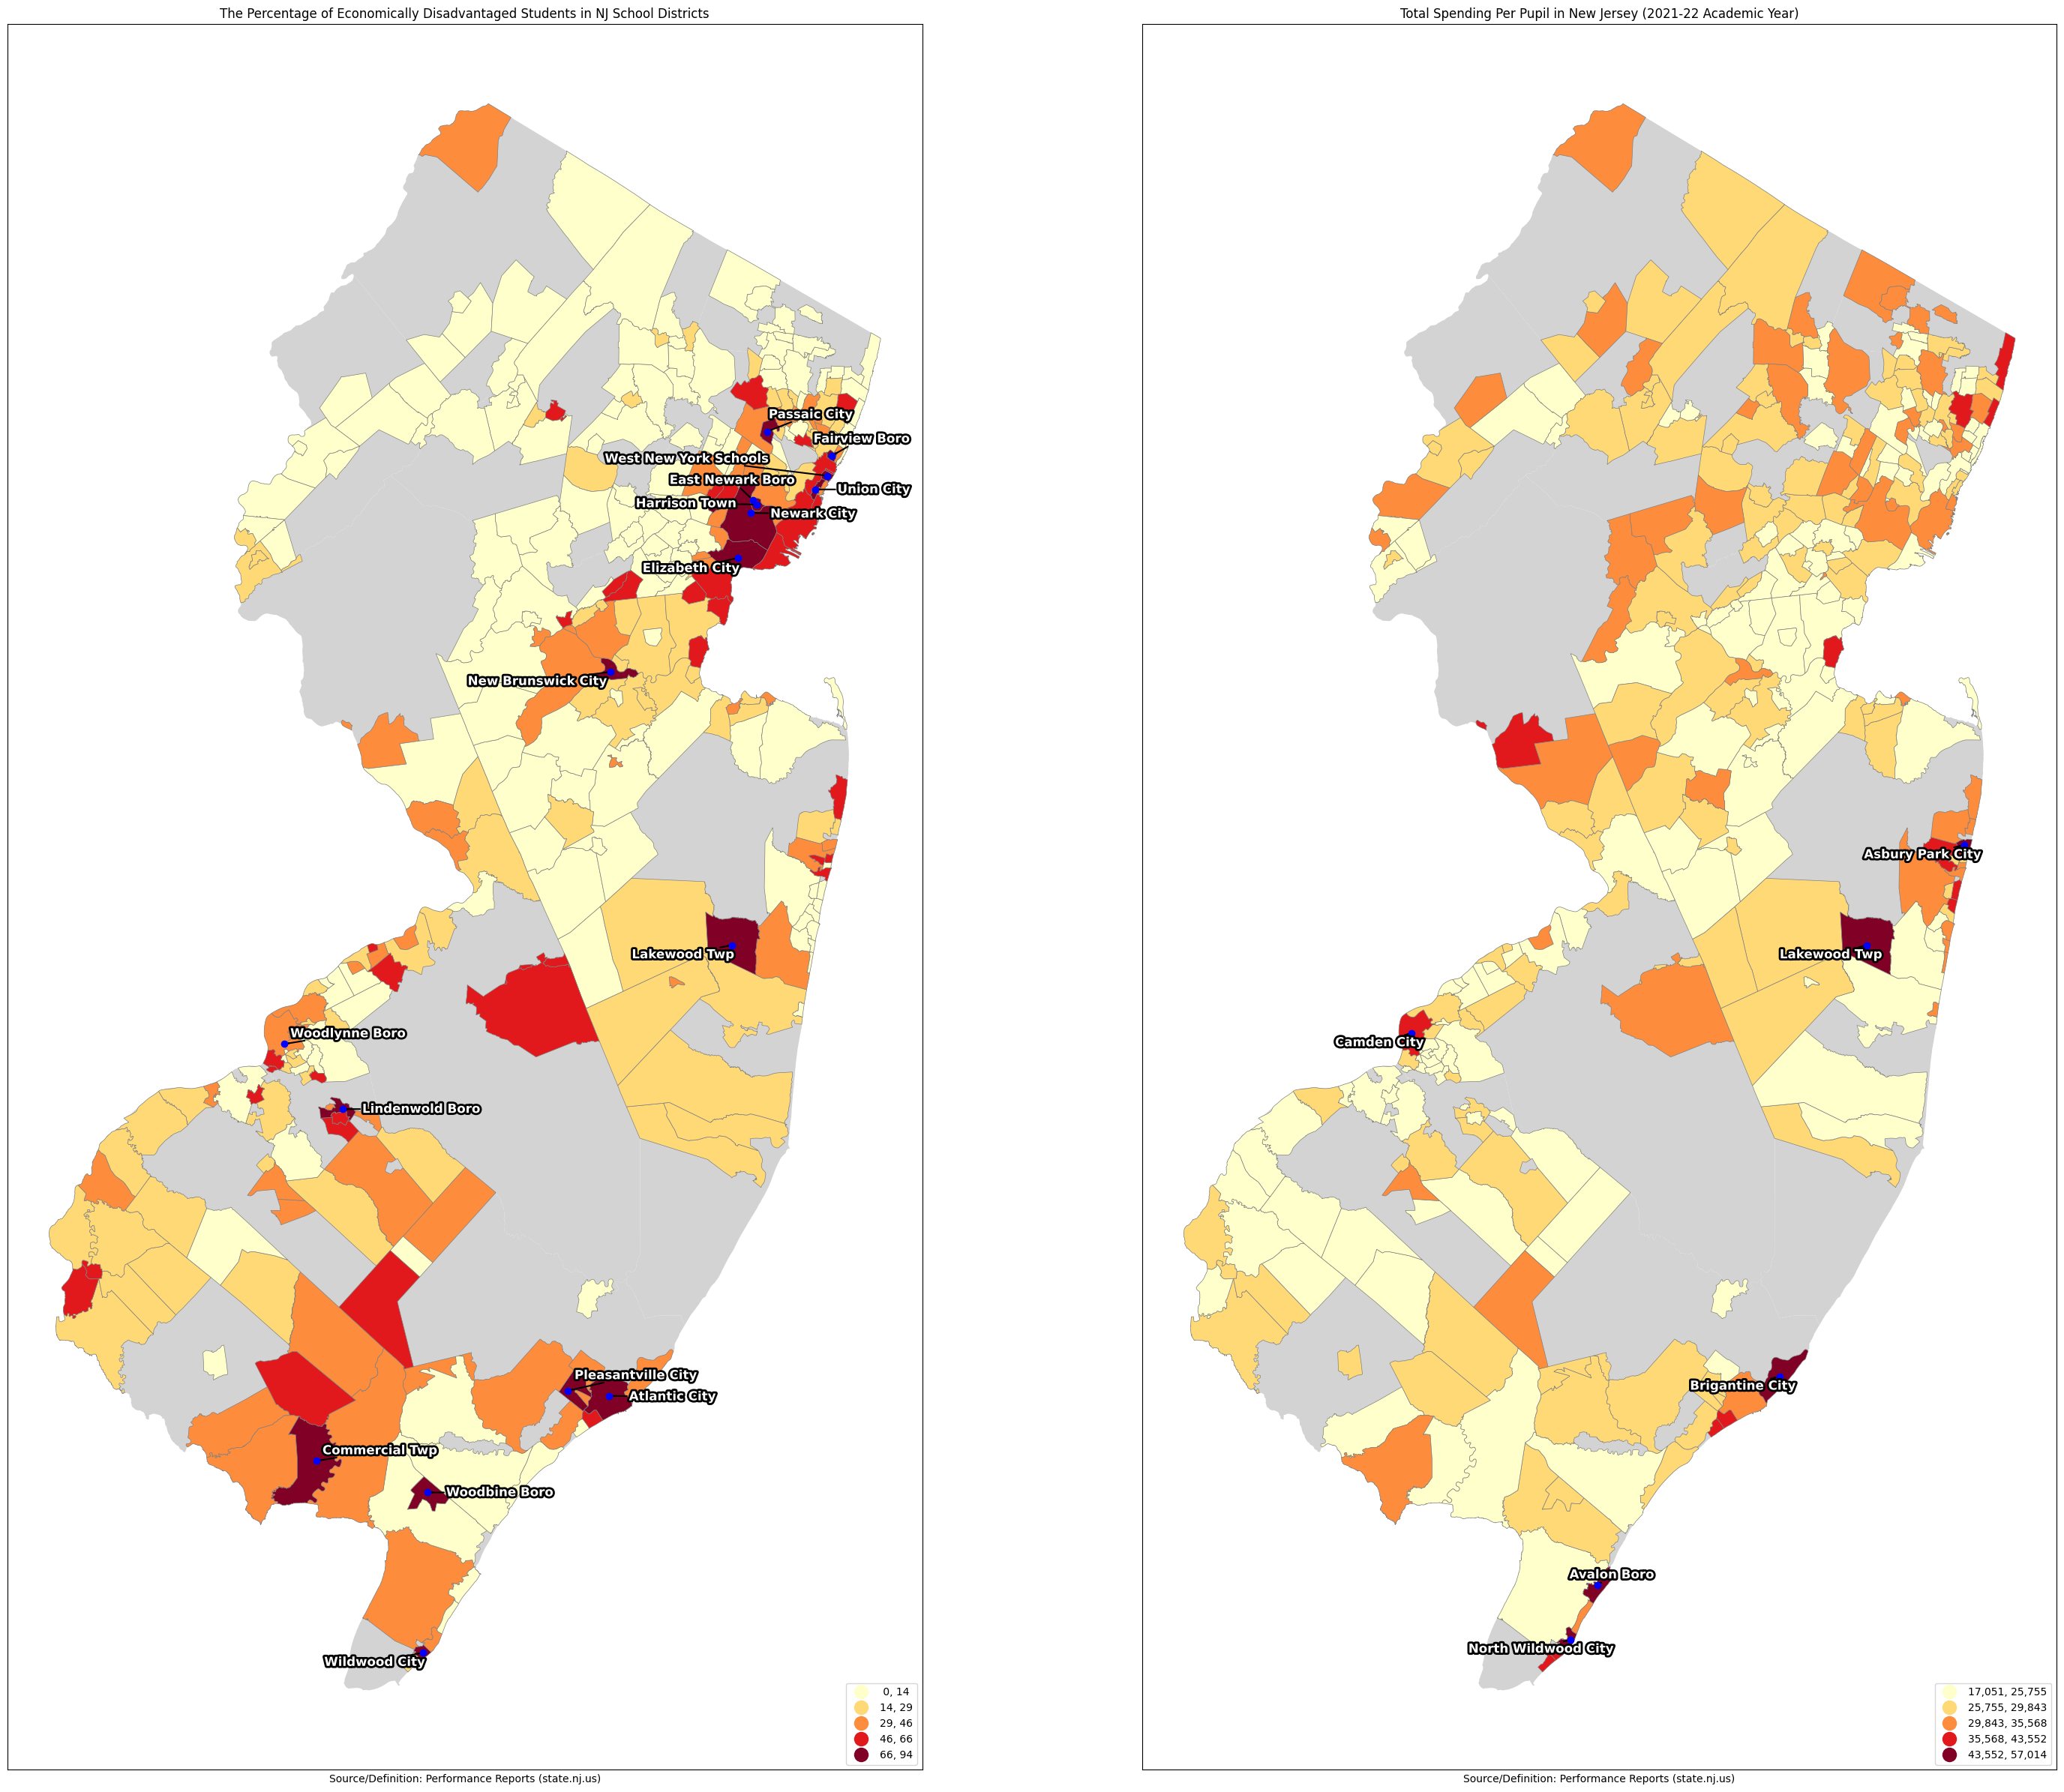

In [21]:
from matplotlib.patheffects import withStroke
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Set geometry_x as the active geometry column
econdis1 = econdis1.set_geometry('geometry_x')

# Ensure the combined GeoDataFrame (econdis1) has the correct CRS
econdis1 = econdis1.to_crs(njC0.crs)

# Define thresholds for annotations
high_disadv = econdis1[econdis1['econ_dis'] >= 66]
high_ppe = econdis1[econdis1['PPE_x'] >= 43552]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 24))

# Map 1: Economically Disadvantaged Students
njC0.plot(ax=ax1, color='lightgray', label='No data available')
econdis1.plot(ax=ax1, column='econ_dis', cmap='YlOrRd',
              scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

# Annotate high disadvantage districts with points and labels
texts = []
for idx, row in high_disadv.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax1.plot(rep_point.x, rep_point.y, 'bo')  # Plot points for debugging
    district_name = row['district_name'].replace('School District', 'SD')
    texts.append(ax1.text(rep_point.x, rep_point.y, district_name, fontsize=12,
                          ha='center', va='center', color='white', fontweight='bold',
                          path_effects=[withStroke(linewidth=4, foreground='black')]))

# Adjust the labels using adjust_text to avoid overlap and add arrows
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

ax1.set_title("The Percentage of Economically Disadvantaged Students in NJ School Districts")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("Source/Definition: Performance Reports (state.nj.us)")

# Map 2: Per Pupil Spending
njC0.plot(ax=ax2, color='lightgray', label='No data available')
econdis1.plot(ax=ax2, column='PPE_y', cmap='YlOrRd',
              scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

# Annotate high spending districts with points and labels
texts = []
for idx, row in high_ppe.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax2.plot(rep_point.x, rep_point.y, 'bo')  # Plot points for debugging
    district_name = row['district_name'].replace('School District', 'SD')
    texts.append(ax2.text(rep_point.x, rep_point.y, district_name, fontsize=12,
                          ha='center', va='center', color='white', fontweight='bold',
                          path_effects=[withStroke(linewidth=4, foreground='black')]))

# Adjust the labels using adjust_text to avoid overlap and add arrows
adjust_text(texts, ax=ax2, arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

ax2.set_title("Total Spending Per Pupil in New Jersey (2021-22 Academic Year)")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("Source/Definition: Performance Reports (state.nj.us)")

# Adjust spacing between plots for better readability
plt.tight_layout()

# Optional: save the figure to a file
# plt.savefig('side_by_side_maps_debug.pdf', bbox_inches='tight')
# files.download('side_by_side_maps_debug.pdf')  # Uncomment if using in a Jupyter environment with file download capabilities

plt.show();



In [22]:
# Drop the specified columns from the Camden_county dataset
econdis1 = econdis1.drop(columns=["DIST_NAME_y", "GEOID_y", "district_name_x", "PPE_y", "PPE_K_y", "countyname_y", "countyname_x", "district_name_y"])


In [23]:
# Rename the specified columns in the Camden_county dataset
econdis1 = econdis1.rename(columns={"DIST_NAME_x": "dist_name","PPE_x": "PPE","PPE_K_x": "PPE_K", "GEOID_x": "GEOID"})

In [24]:
econdis1.dtypes

dist_code           int64
dist_name          object
GEOID              object
geometry_x       geometry
countyname         object
district_name      object
PPE                 int32
PPE_K             float32
geometry_y       geometry
econ_dis          float64
female            float32
male              float32
_merge           category
dtype: object

In [25]:
econdis1['GEOID'] = econdis1['GEOID'].astype(int) ## making GEOID code an integer

In [26]:
econdis1 = econdis1.drop(columns=["_merge"])

In [27]:
medinc = pd.read_stata('https://github.com/OluPaul22/data/blob/main/MedIncomeNJ.dta?raw=true')


In [28]:
econdis1.dtypes

dist_code           int64
dist_name          object
GEOID               int64
geometry_x       geometry
countyname         object
district_name      object
PPE                 int32
PPE_K             float32
geometry_y       geometry
econ_dis          float64
female            float32
male              float32
dtype: object

In [29]:
#merge function
njschdst = pd.merge(econdis1, medinc, on='GEOID',how='outer',indicator=True)

In [30]:
#merge function
njschdst1 = pd.merge(econdis1, medinc, on='GEOID',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [31]:
camden_county = njschdst1[njschdst1['countyname'].str.lower() == 'camden']

In [32]:
camden_county.head(2)

dist_code                       dist_name_x    GEOID  \
32       5820  Winslow Township School District  3418060   
38        150    Audubon Public School District  3401050   

                                           geometry_x countyname  \
32  POLYGON ((368609.977 344389.586, 368631.27 344...     Camden   
38  POLYGON ((333599.519 389532.256, 334908.018 38...     Camden   

                    district_name    PPE      PPE_K  \
32                    Winslow Twp  27756  27.756001   
38  Audubon Public School Disrict  24431  24.431000   

                                           geometry_y  econ_dis  female  male  \
32  POLYGON ((368609.977 344389.586, 368631.27 344...      35.2    45.0  55.0   
38  POLYGON ((333599.519 389532.256, 334908.018 38...      17.8    50.0  50.0   

    UniSD                       dist_name_y  MedInc  
32  18060  Winslow Township School District   87179  
38  01050   Audubon Borough School District   93670

In [33]:
# Rename the specified columns in the Camden_county dataset
camden_county = camden_county.rename(columns={"dist_name_x": "dist_name"})

In [34]:
camden_county.dtypes

dist_code           int64
dist_name          object
GEOID               int64
geometry_x       geometry
countyname         object
district_name      object
PPE                 int32
PPE_K             float32
geometry_y       geometry
econ_dis          float64
female            float32
male              float32
UniSD              object
dist_name_y        object
MedInc              int32
dtype: object

## Mapping Median Household Income in Camden County

<Axes: >

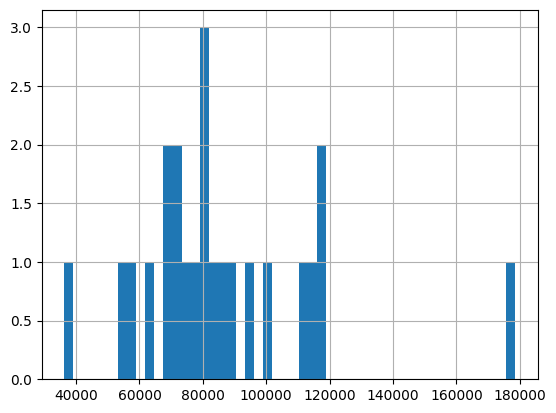

In [35]:
camden_county.MedInc.hist(bins=50)

In [36]:
camden_county.MedInc.sort_values()

253     36258
80      53645
179     58288
180     62917
118     68125
54      69176
259     71756
167     72375
108     74250
40      78909
252     80248
48      81012
188     81800
115     82070
32      87179
173     87593
38      93670
111     99799
55     112352
137    113500
49     116339
47     117556
50     178578
Name: MedInc, dtype: int32

### Checking out the classifications

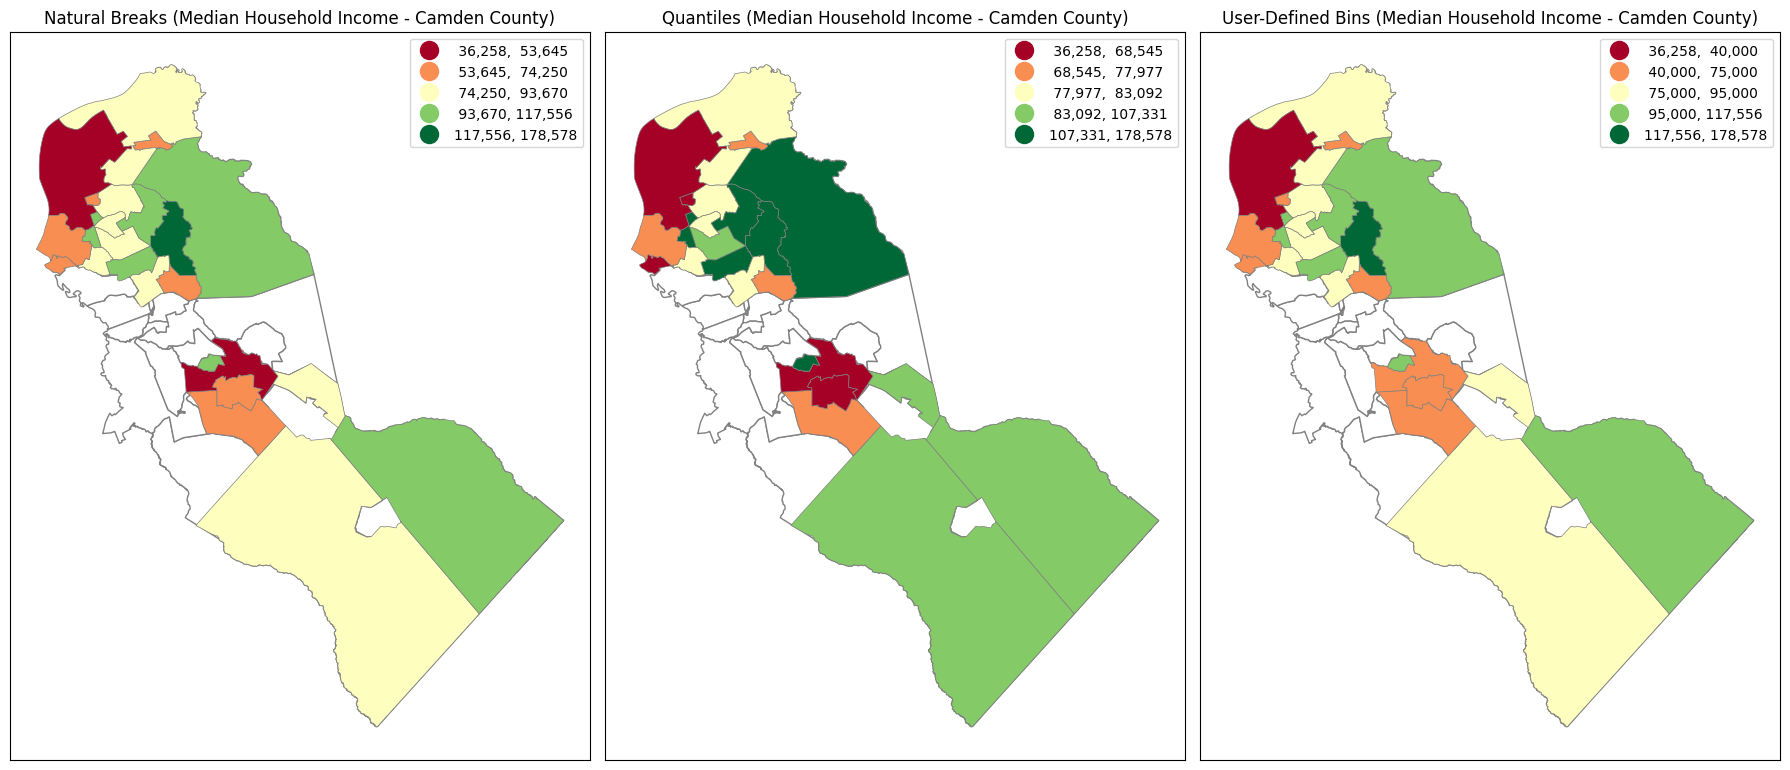

In [42]:
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure the GeoDataFrame camschdis1 has the correct CRS
camden_county = camden_county.to_crs(njC0.crs)  # Assuming njC0 has the correct CRS

# Create subplots for three maps (Natural Breaks, Quantiles, User-Defined Bins)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

# Plot 1: Natural Breaks Classification for Camden County (MedInc)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax1, column='MedInc', cmap='RdYlGn',
                scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax1.set_title("Natural Breaks (Median Household Income - Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: Quantiles Classification for Camden County (MedInc)
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax2, column='MedInc', cmap='RdYlGn',
                scheme='quantiles', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax2.set_title("Quantiles (Median Household Income - Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: User-Defined Bins for Camden County (MedInc)
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax3, column='MedInc', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [40000, 75000, 95000, 117556]},
                edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax3.set_title("User-Defined Bins (Median Household Income - Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the maps
plt.show();


In [43]:
camden_county2 = camden_county[['district_name','MedInc']].sort_values(by='MedInc', ascending=False)
sty = camden_county2.style.background_gradient(cmap='YlOrRd') ## color coding values. You can then extract it as an image and map it.
sty

In [44]:
%%capture
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


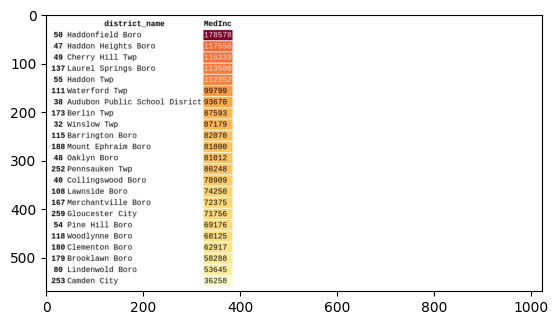

In [45]:
imgkit.from_string(sty.to_html(), 'sty.jpg')

import matplotlib.image as mpimg
img = mpimg.imread('sty.jpg')
plt.imshow(img);

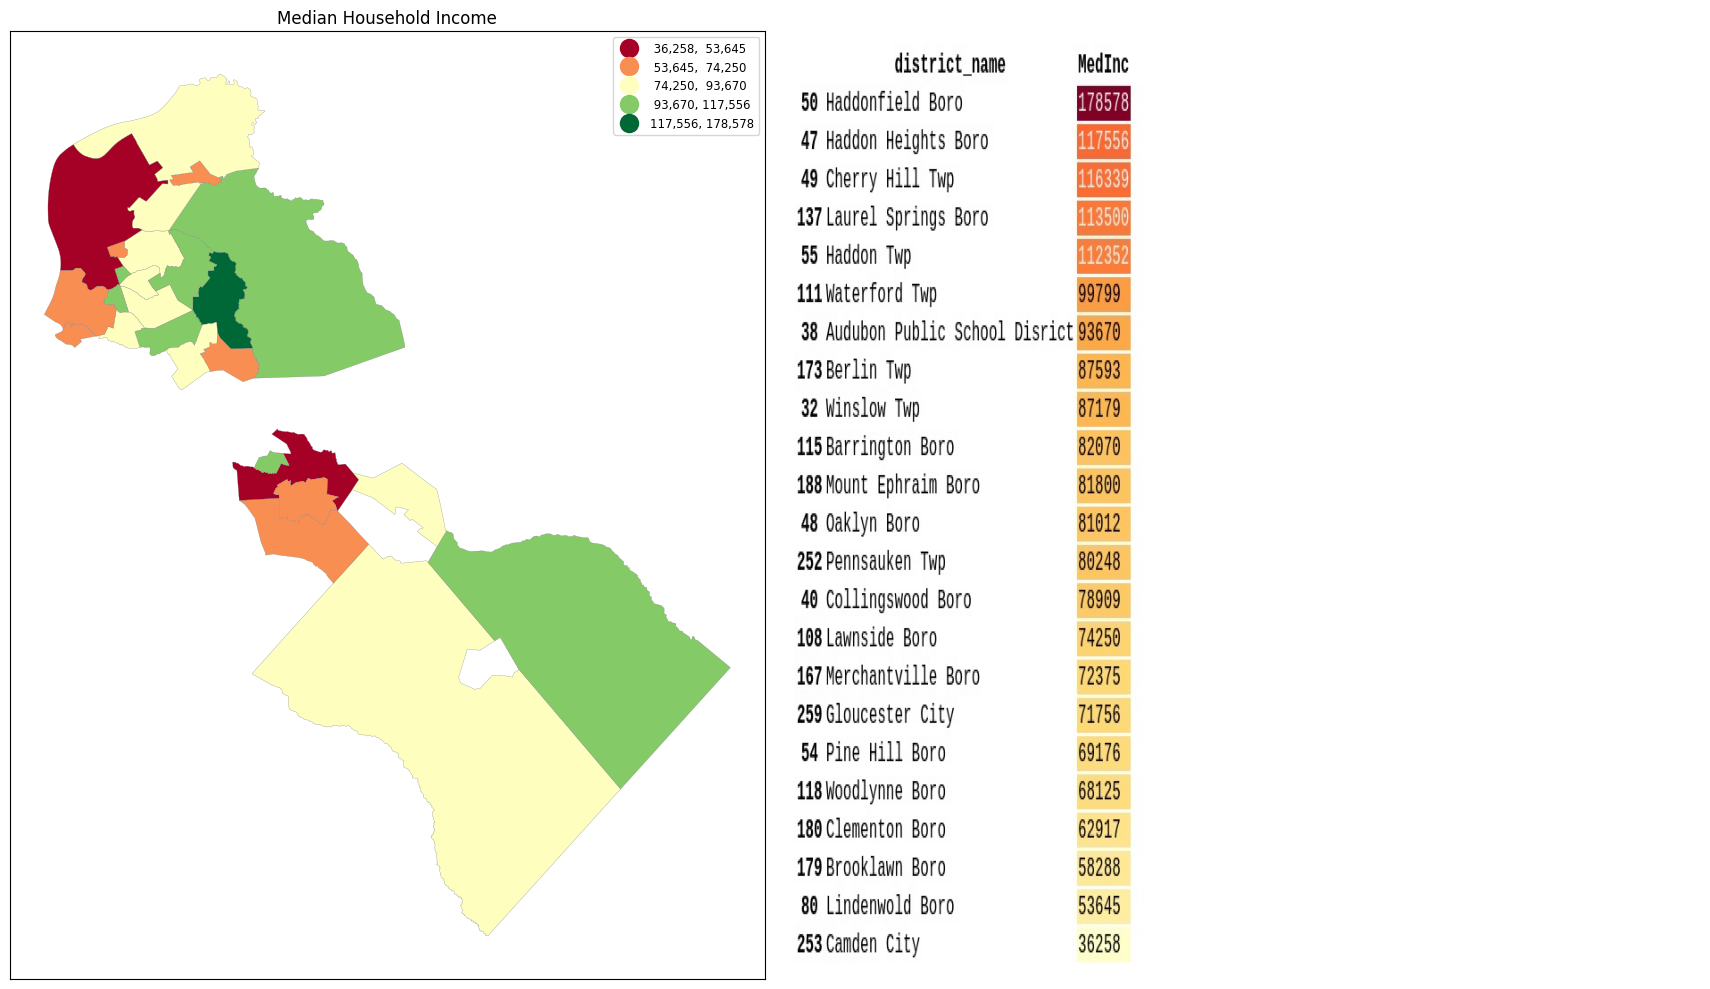

In [46]:
fig, axs = plt.subplots(1,2, figsize=(18,10),tight_layout=True)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=axs[0],column='MedInc',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Median Household Income")
axs[0].set_xticks([]); axs[0].set_yticks([])

axs[1].imshow(img,aspect='auto') #,  extent=[0,1,0,1]  aspect=3.5
axs[1].set_axis_off()
axs[1].set_xticks([]); axs[1].set_yticks([]);

## Mapping the percentage of economically disadvantages students in Camden County School Districts

<Axes: >

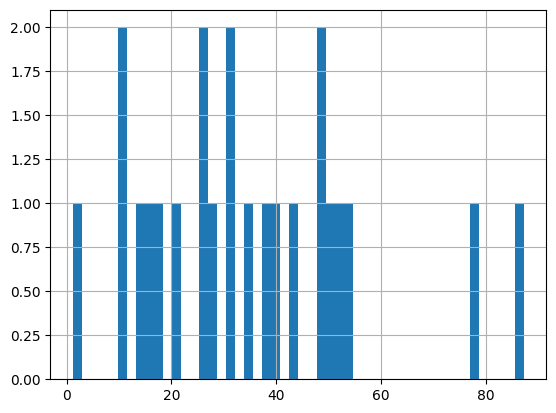

In [47]:
camden_county.econ_dis.hist(bins=50)

In [48]:
camden_county.econ_dis.sort_values()

50      1.2
55      9.9
49     10.3
47     14.0
115    15.4
38     17.8
48     21.3
188    26.4
111    26.8
167    28.0
40     30.7
137    31.8
32     35.2
173    38.4
253    39.6
252    43.1
108    47.8
54     48.6
259    49.7
179    52.7
180    53.8
80     78.0
118    87.3
Name: econ_dis, dtype: float64

### Checking out the classifications (natural breaks, quantiles, and my division)

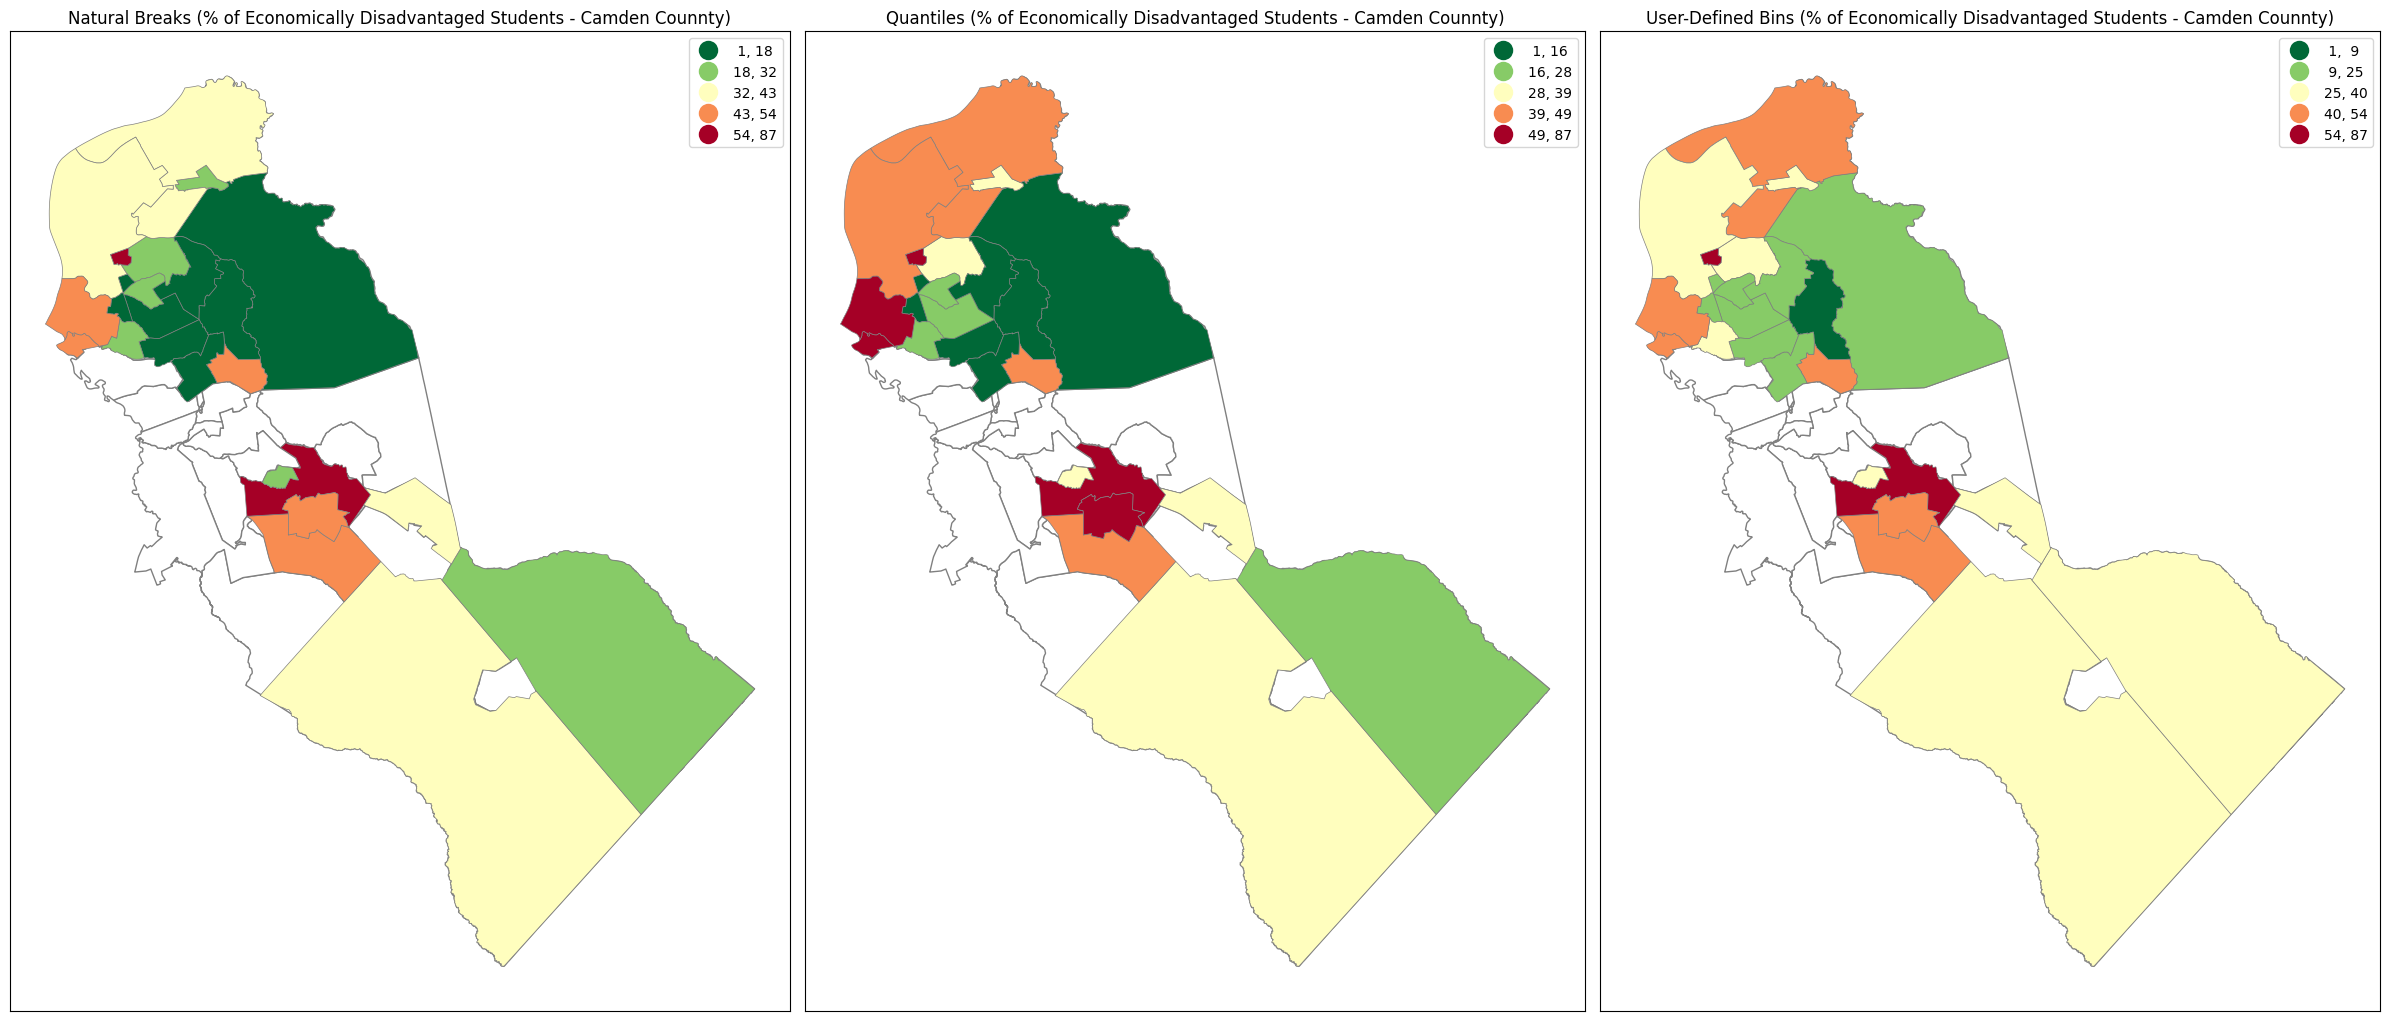

In [54]:
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure the GeoDataFrame camschdis1 has the correct CRS
camden_county = camden_county.to_crs(njC0.crs)  # Assuming njC0 has the correct CRS

# Create subplots for three maps (Natural Breaks, Quantiles, User-Defined Bins for econ_dis)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 12))

# Plot 1: Natural Breaks Classification for Camden County (econ_dis)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax1, column='econ_dis', cmap='RdYlGn_r',
                scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax1.set_title("Natural Breaks (% of Economically Disadvantaged Students - Camden Counnty)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: Quantiles Classification for Camden County (econ_dis)
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax2, column='econ_dis', cmap='RdYlGn_r',
                scheme='quantiles', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax2.set_title("Quantiles (% of Economically Disadvantaged Students - Camden Counnty)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: User-Defined Bins for Camden County (econ_dis)
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camden_county.plot(ax=ax3, column='econ_dis', cmap='RdYlGn_r',
                scheme='user_defined', classification_kwds={'bins': [9, 25, 40, 53.8]},
                edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax3.set_title("User-Defined Bins (% of Economically Disadvantaged Students - Camden Counnty)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the maps
plt.show();


## Mapping Total Spending Per Pupil in Camden County District Schools

<Axes: >

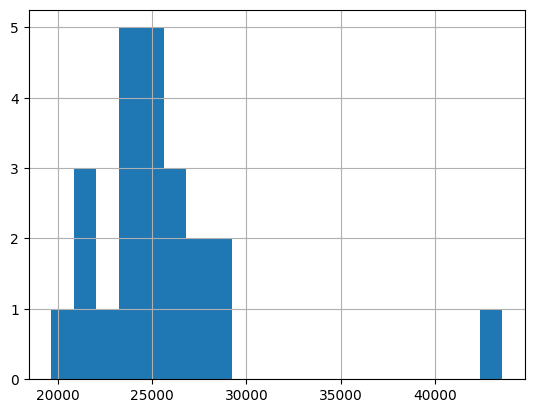

In [56]:
camden_county.PPE.hist(bins=20)

In [52]:
camden_county.PPE.sort_values()

137    19645
47     21625
50     21697
167    21807
48     22731
55     23483
40     23726
179    23746
180    23833
111    23924
38     24431
49     24972
188    25024
115    25149
173    25396
118    26230
54     26758
108    26795
80     27144
32     27756
252    28344
259    28627
253    43552
Name: PPE, dtype: int32

### Checking the classifications

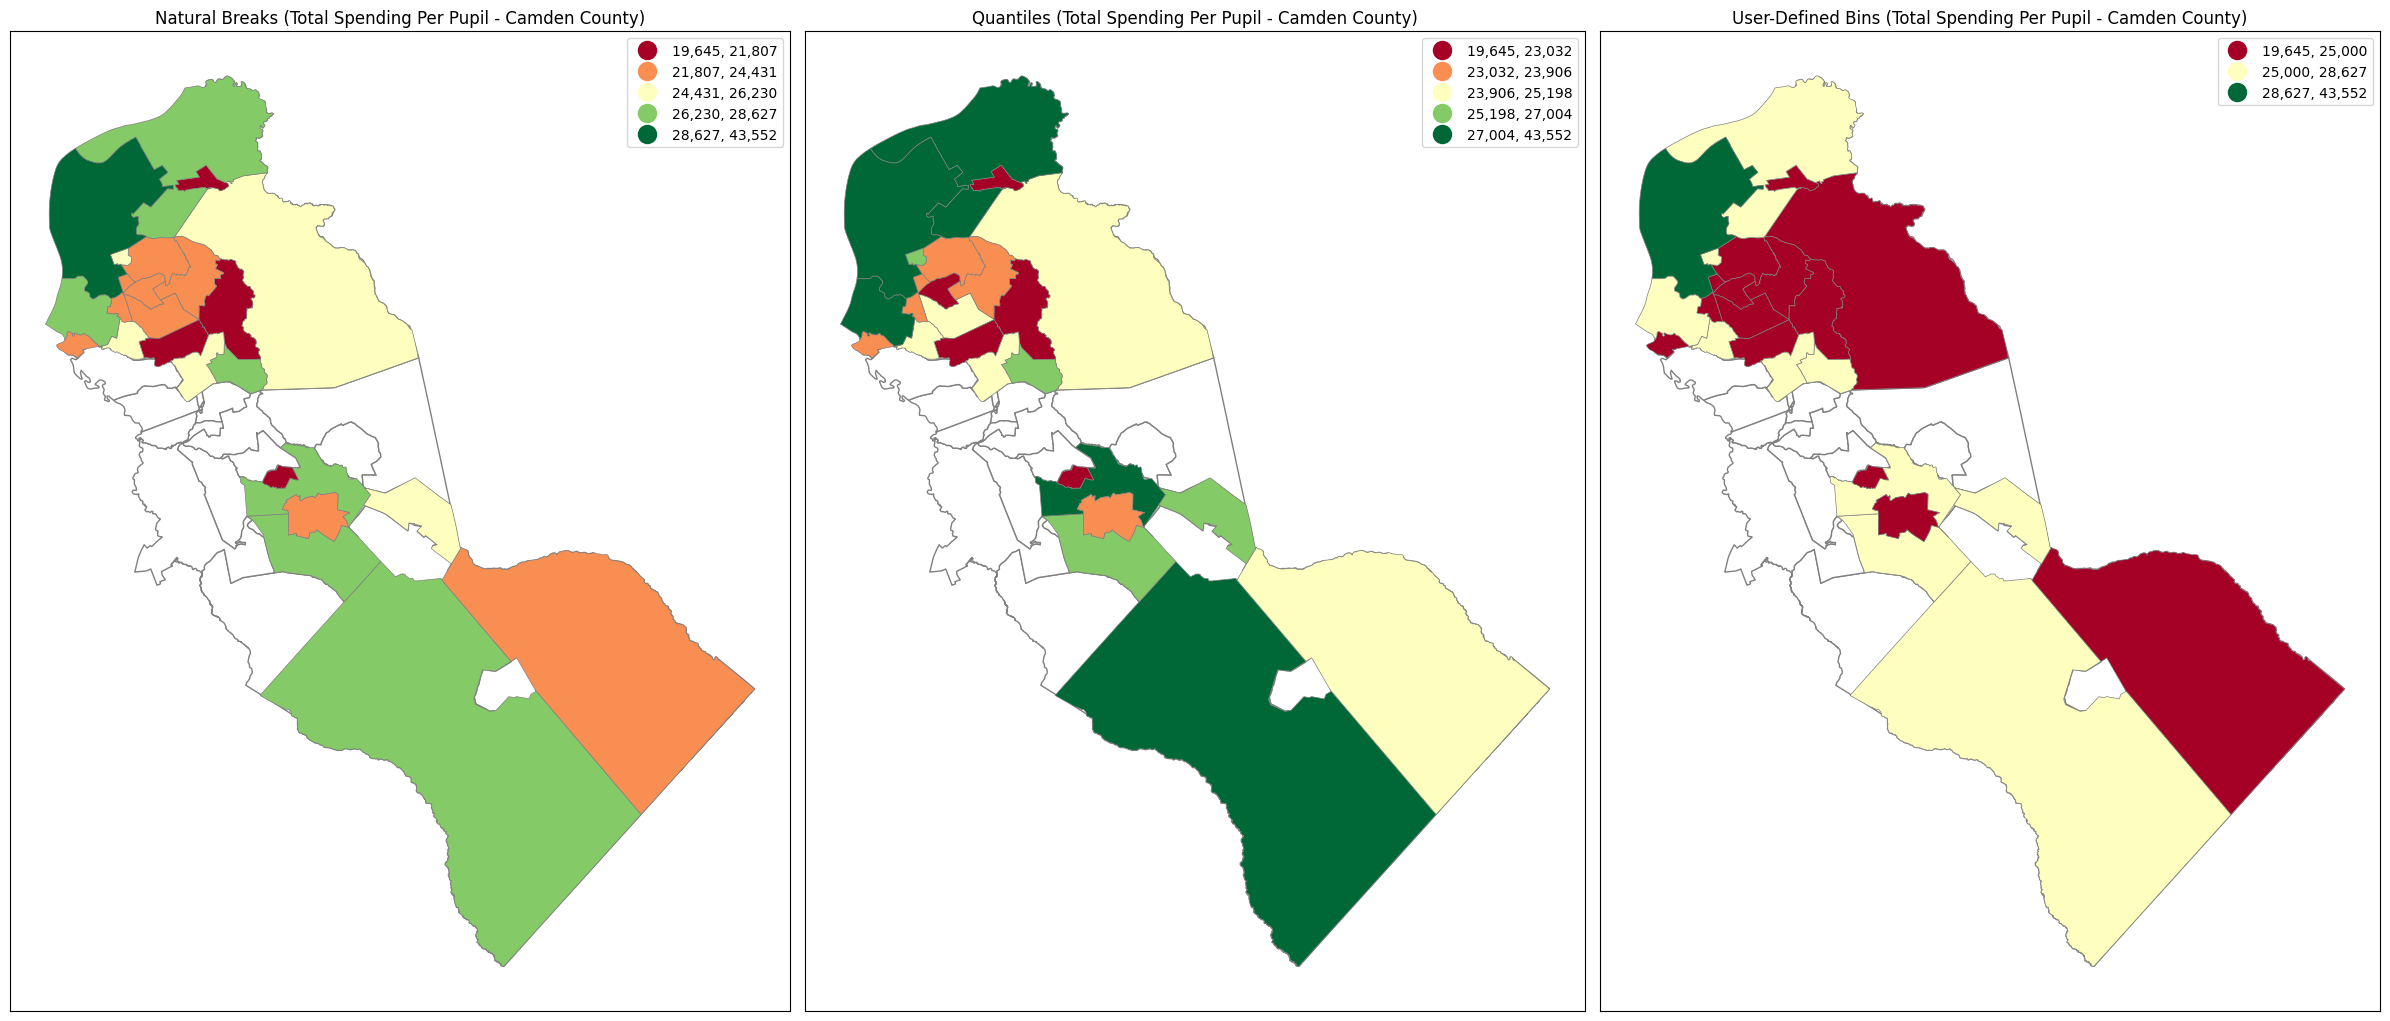

In [55]:
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure the GeoDataFrame camschdis1 has the correct CRS
camden_county = camden_county.to_crs(njC0.crs)  # Assuming njC0 has the correct CRS

# Create subplots for three maps (Natural Breaks, Quantiles, User-Defined Bins for PPE)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 12))

# Plot 1: Natural Breaks Classification for Camden County (PPE)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax1, column='PPE', cmap='RdYlGn',
                scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax1.set_title("Natural Breaks (Total Spending Per Pupil - Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: Quantiles Classification for Camden County (PPE)
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax2, column='PPE', cmap='RdYlGn',
                scheme='quantiles', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax2.set_title("Quantiles (Total Spending Per Pupil - Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: User-Defined Bins for Camden County (PPE)
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax3, column='PPE', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [25000, 28627]},
                edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax3.set_title("User-Defined Bins (Total Spending Per Pupil - Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the maps
plt.show();

## Evaluating redistribution or spending equity by mapping Median Household Income, Percentage of Economically Disadvantaged Students, and Total Spending Per Pupil in Camden County School Districts (with user-defined bins).

* This map shows clearly that there is a good amount of redistribution or equity in total spending per pupil in Camden County.

* Exceptional cases: Despite having a low median household income and serving a high percentage of economically disadvantaged students, Clementon Borough is among the schools with the lowest total spending per pupil.

* Also, Woodlynne Boro and Linderwold Boro, with relatively low median household income and serving the highest percentage of economically disadvantaged students, should be spending more alongside Camden City.




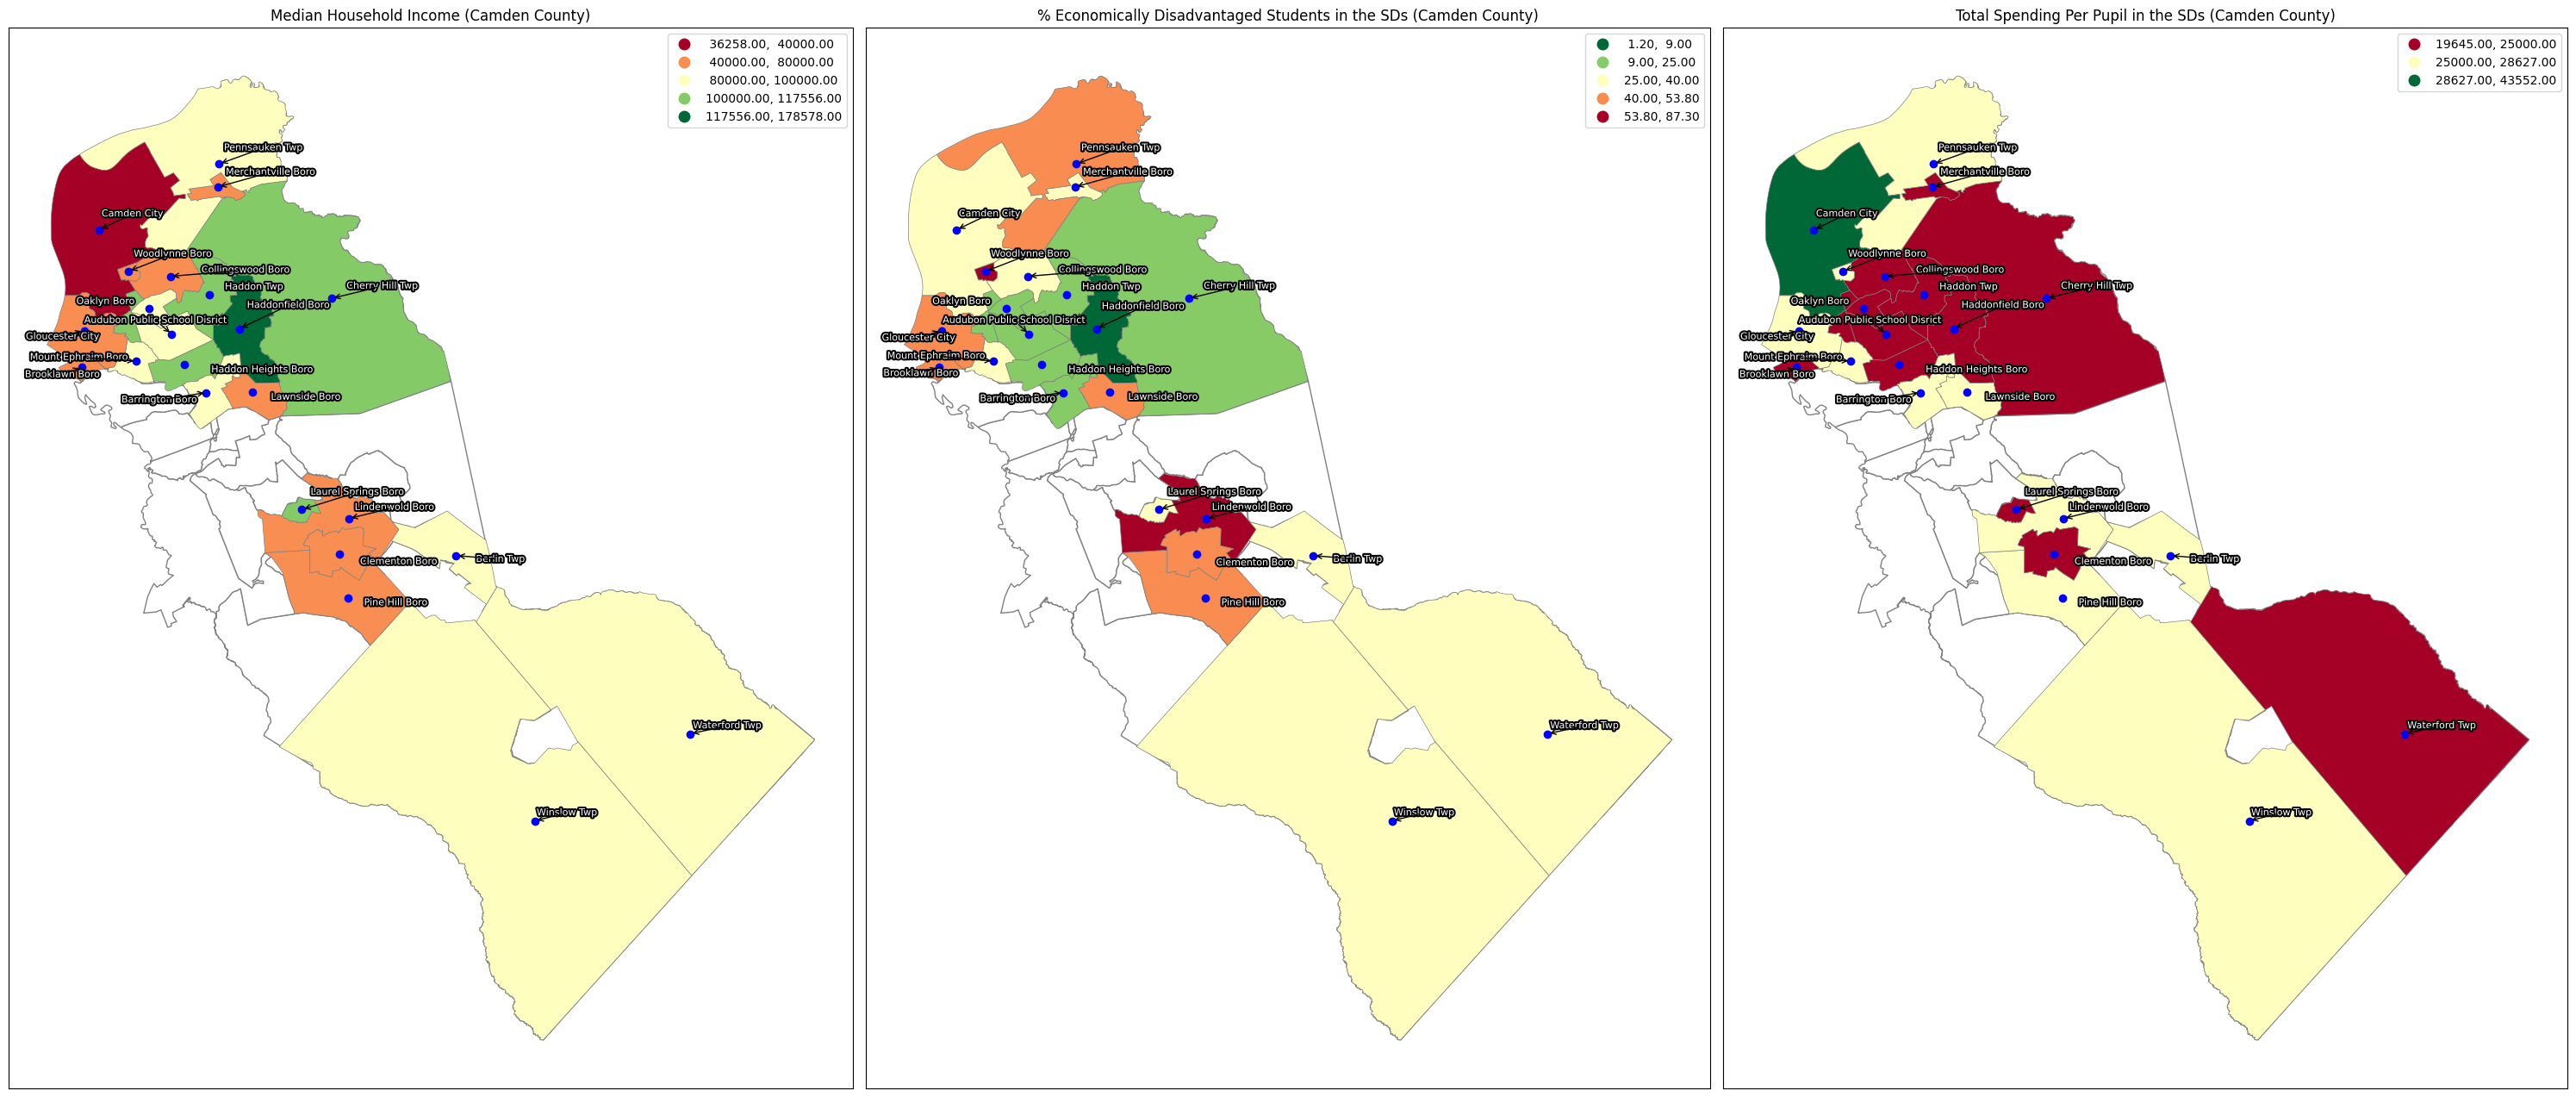

In [58]:
from adjustText import adjust_text
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure your GeoDataFrame has a valid geometry and CRS (should already be done)
camden_county = camden_county.to_crs(Camden.crs)  # Ensure CRS matches Camden

# Abbreviate long district names
camden_county['short_name'] = camden_county['district_name'].apply(lambda x: x.replace(' Township', ' Twp').replace(' Borough', ' Boro'))

# Create subplots for three maps (MedInc, econ_dis, PPE) with larger figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15))

# Path effect for white text with black outline
text_style = [withStroke(linewidth=3, foreground='black')]

# Plot 1: Median Income (MedInc) with labels and leader lines
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax1, column='MedInc', cmap='RdYlGn',
                   scheme='user_defined', classification_kwds={'bins': [40000, 80000, 100000, 117556]},
                   edgecolor='grey', linewidth=0.5, legend=True)

# Create labels with white text, black outline, and leader lines
texts = []
for idx, row in camden_county.iterrows():
    rep_point = row.geometry_x.representative_point()  # Use representative point to avoid outside centroids
    ax1.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax1.text(rep_point.x, rep_point.y, short_name, fontsize=8, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

# Adjust text positions to avoid overlapping and add arrows with increased shrinkA
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle='->', color='black', lw=1.0, shrinkA=5), expand_text=(1.2, 1.2))


ax1.set_title("Median Household Income (Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: econ_dis (Economically Disadvantaged) with labels and leader lines
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax2, column='econ_dis', cmap='RdYlGn_r',
                   scheme='user_defined', classification_kwds={'bins': [9, 25, 40, 53.8]},
                   edgecolor='grey', linewidth=0.5, legend=True)

texts = []
for idx, row in camden_county.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax2.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax2.text(rep_point.x, rep_point.y, short_name, fontsize=8, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

adjust_text(texts, ax=ax2, arrowprops=dict(arrowstyle='->', color='black', lw=1.0, shrinkA=5), expand_text=(1.2, 1.2))

ax2.set_title("% Economically Disadvantaged Students in the SDs (Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: PPE (Per Pupil Expenditure) with labels and leader lines
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax3, column='PPE', cmap='RdYlGn',
                   scheme='user_defined', classification_kwds={'bins': [25000, 28627]},
                   edgecolor='grey', linewidth=0.5, legend=True)

texts = []
for idx, row in camden_county.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax3.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax3.text(rep_point.x, rep_point.y, short_name, fontsize=8, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle='->', color='black', lw=1.0, shrinkA=5), expand_text=(1.2, 1.2))

ax3.set_title("Total Spending Per Pupil in the SDs (Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the combined maps
plt.show();

### Scatter Plot showing inverse relationship between "% econ disadv." and "median household income"

In [59]:
import plotly.express as px

# Assuming camschdis1 has the columns 'MedInc', 'econ_dis', and 'PPE'
fig = px.scatter(camden_county, x="MedInc", y="econ_dis",color="PPE",
                 hover_data=['district_name'],
                 labels={"MedInc": "Median Household Income","econ_dis": "% Economically Disadvantaged",
                     "PPE": "Total Spending Per Pupil"}, width=1000, height=600)

# Show the plot
fig.show()


## Mapping College Enrollment (2021)

In [60]:
  colenrl = pd.read_stata('https://github.com/OluPaul22/data/blob/main/NJColEnroll.dta?raw=true')

In [61]:
colenrl.dtypes

county_name       object
dist_code          int16
district_name     object
colenr           float64
dtype: object

In [62]:
colenrl2 = colenrl[['district_name','dist_code','colenr']].sort_values(by='colenr', ascending=False)
sty = colenrl2.style.background_gradient(cmap='YlOrRd') ## color coding values. You can then extract it as an image and map it.
sty

<Axes: >

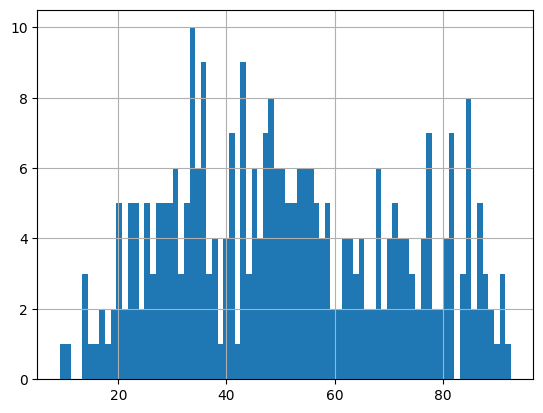

In [63]:
colenrl.colenr.hist(bins=80)

In [64]:
camden_county.dtypes

dist_code           int64
dist_name          object
GEOID               int64
geometry_x       geometry
countyname         object
district_name      object
PPE                 int32
PPE_K             float32
geometry_y       geometry
econ_dis          float64
female            float32
male              float32
UniSD              object
dist_name_y        object
MedInc              int32
short_name         object
dtype: object

In [65]:
Cam_county = pd.merge(camden_county, colenrl, on='dist_code',how='outer',indicator=True)

In [66]:
merged_rows = Cam_county[Cam_county['_merge'] == 'both'].shape[0]
print(f'Number of observations that merged: {merged_rows}')

Number of observations that merged: 12


In [67]:
#merge function
Cam_county1 = pd.merge(camden_county, colenrl, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [68]:
Cam_county1.dtypes

dist_code             int64
dist_name            object
GEOID                 int64
geometry_x         geometry
countyname           object
district_name_x      object
PPE                   int32
PPE_K               float32
geometry_y         geometry
econ_dis            float64
female              float32
male                float32
UniSD                object
dist_name_y          object
MedInc                int32
short_name           object
county_name          object
district_name_y      object
colenr              float64
dtype: object

<Axes: >

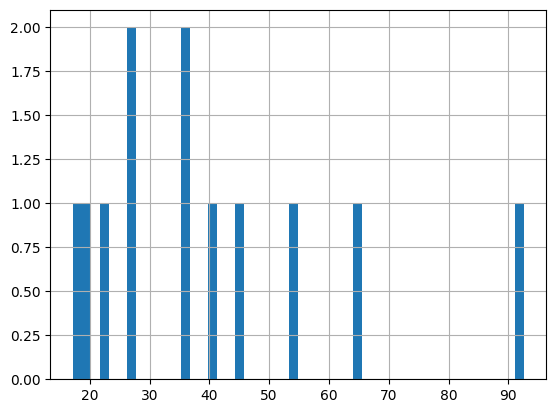

In [69]:
Cam_county1.colenr.hist(bins=50)

In [70]:
Cam_county1.colenr.sort_values()

6     17.2
8     20.0
10    23.1
9     26.4
11    27.6
2     36.2
0     36.3
1     40.9
3     45.6
7     53.7
4     65.4
5     92.6
Name: colenr, dtype: float64

### Checking out the college enrollment classifications

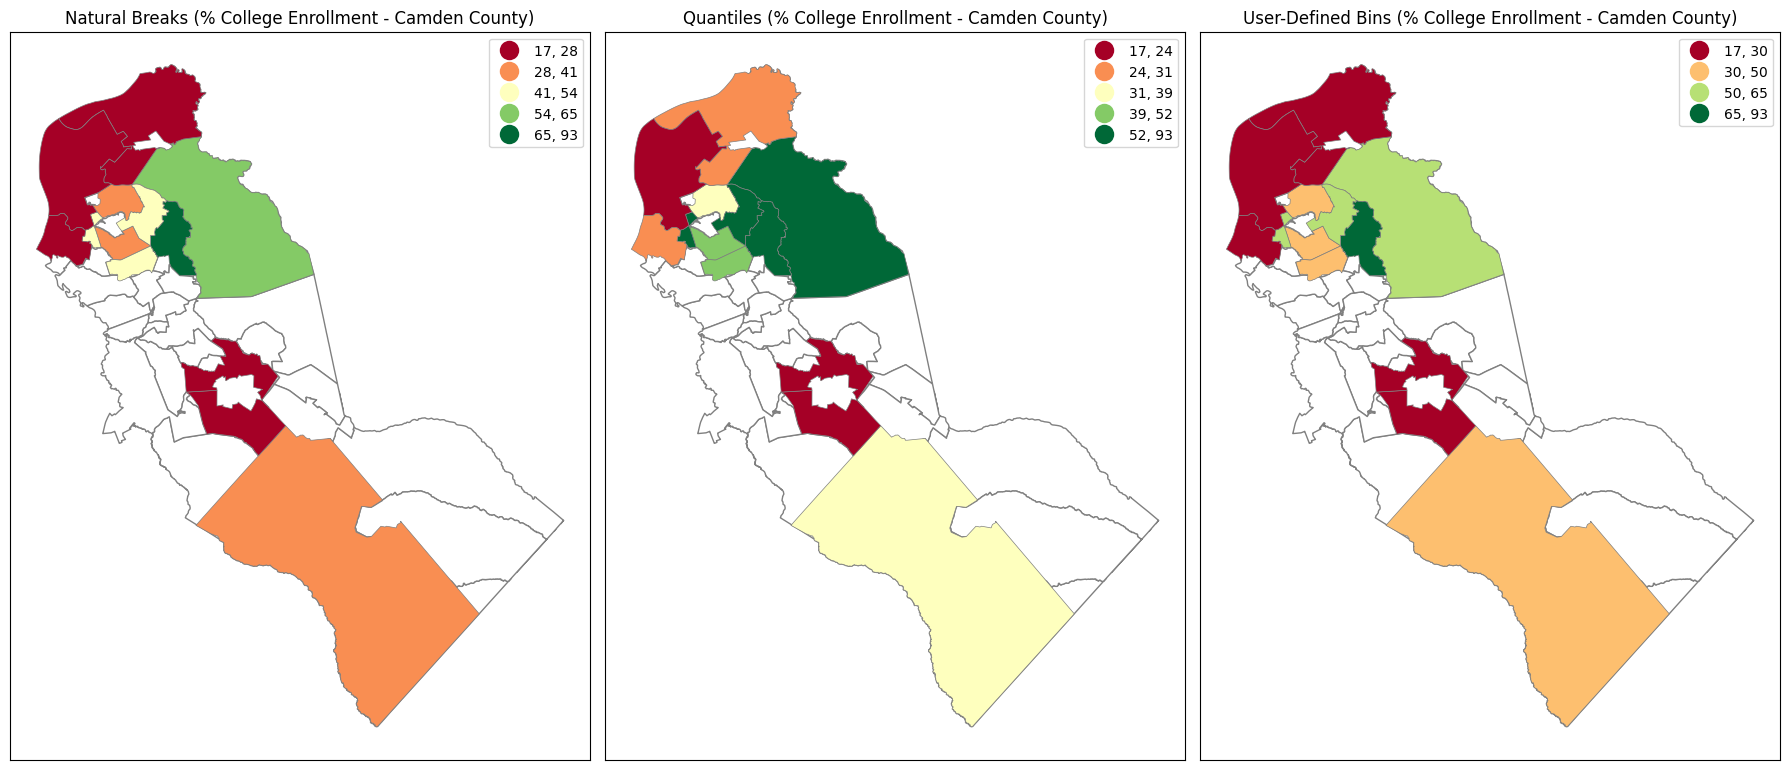

In [72]:
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure the GeoDataFrame camschdis1 has the correct CRS
Cam_county1 = Cam_county1.to_crs(njC0.crs)  # Assuming njC0 has the correct CRS

# Create subplots for three maps (Natural Breaks, Quantiles, User-Defined Bins for colenr)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

# Plot 1: Natural Breaks Classification for Camden County (colenr)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
Cam_county1.plot(ax=ax1, column='colenr', cmap='RdYlGn',
                scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax1.set_title("Natural Breaks (% College Enrollment - Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: Quantiles Classification for Camden County (colenr)
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
Cam_county1.plot(ax=ax2, column='colenr', cmap='RdYlGn',
                scheme='quantiles', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax2.set_title("Quantiles (% College Enrollment - Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: User-Defined Bins for Camden County (colenr)
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
Cam_county1.plot(ax=ax3, column='colenr', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [30, 50, 65.4]},
                edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax3.set_title("User-Defined Bins (% College Enrollment - Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the maps
plt.show();

## Mapping Graduation Rate (2022)

In [73]:
gradrate= pd.read_stata('https://github.com/OluPaul22/data/blob/main/NJGradRate.dta?raw=true')

In [74]:
gradrate.dtypes

countyname        object
dist_code          int16
district_name     object
gradrate         float64
dtype: object

<Axes: >

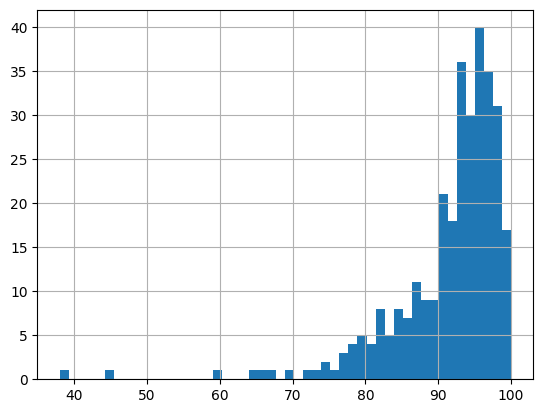

In [76]:
gradrate.gradrate.hist(bins=50)

In [77]:
gradrate2 = gradrate[['district_name','gradrate']].sort_values(by='gradrate', ascending=False)
sty = gradrate2.style.background_gradient(cmap='YlOrRd') ## color coding values. You can then extract it as an image and map it.
sty

In [78]:
camgradrt = pd.merge(camden_county, gradrate, on='dist_code',how='outer',indicator=True)

In [79]:
merged_rows = camgradrt[camgradrt['_merge'] == 'both'].shape[0]
print(f'Number of observations that merged: {merged_rows}')

Number of observations that merged: 12


In [80]:
#merge function
camgradrt1 = pd.merge(camden_county, gradrate, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

<Axes: >

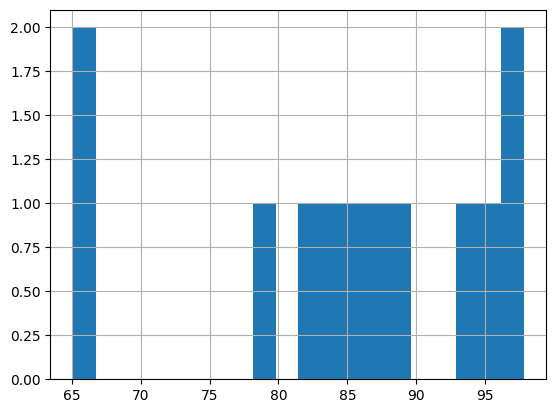

In [81]:
camgradrt1.gradrate.hist(bins=20)

In [82]:
camgradrt1.gradrate.sort_values()

8     65.1
10    66.3
0     78.3
11    82.2
9     84.5
1     85.6
6     86.8
2     88.2
7     94.2
4     94.7
3     97.4
5     97.8
Name: gradrate, dtype: float64

### Checking out the Grad. Rate classifications

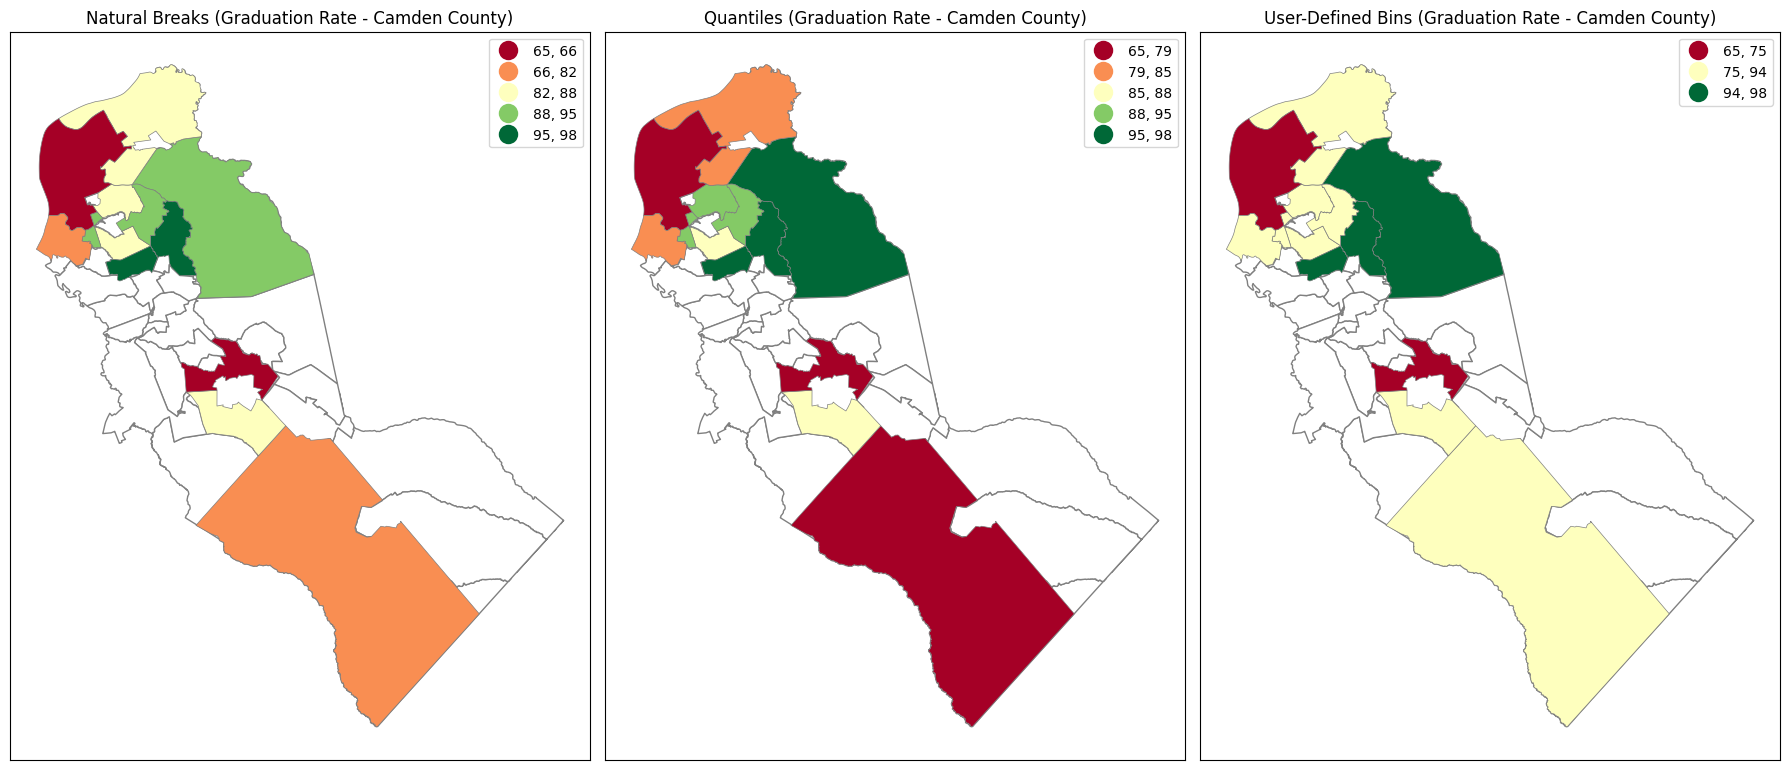

In [83]:
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure the GeoDataFrame camschdis1 has the correct CRS
camgradrt1 = camgradrt1.to_crs(njC0.crs)  # Assuming it has the correct CRS

# Create subplots for three maps (Natural Breaks, Quantiles, User-Defined Bins for gradrate)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

# Plot 1: Natural Breaks Classification for Camden County (gradrate)
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camgradrt1.plot(ax=ax1, column='gradrate', cmap='RdYlGn',
                scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax1.set_title("Natural Breaks (Graduation Rate - Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: Quantiles Classification for Camden County (gradrate)
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camgradrt1.plot(ax=ax2, column='gradrate', cmap='RdYlGn',
                scheme='quantiles', k=5, edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax2.set_title("Quantiles (Graduation Rate - Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: User-Defined Bins for Camden County (gradrate)
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camgradrt1.plot(ax=ax3, column='gradrate', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [75,94.2]},
                edgecolor='grey', linewidth=0.5, legend=True,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1.4})
ax3.set_title("User-Defined Bins (Graduation Rate - Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the maps
plt.show();

### Evaluating the impact of Total Spending Per Pupil on Academic Outcomes using Graduation Rate and % College Enrollment as metrics

* Interestingly, all the school districts that spend less score higher on the academic performance metrics, while most schools that spend more score lower.

* In a few instances, such as Pennsauken Township, Gloucester City, Pine Hill, and Winslow Township, school district spending yields commensurate academic outcomes in the graduation rate metric, but poorly in the college enrollment metric.

* It is particularly impressive that Haddonfield School District, which spent less than all the other school districts, produces the best academic outcomes in both metrics in Camden County and is equally one of the highest in the state.

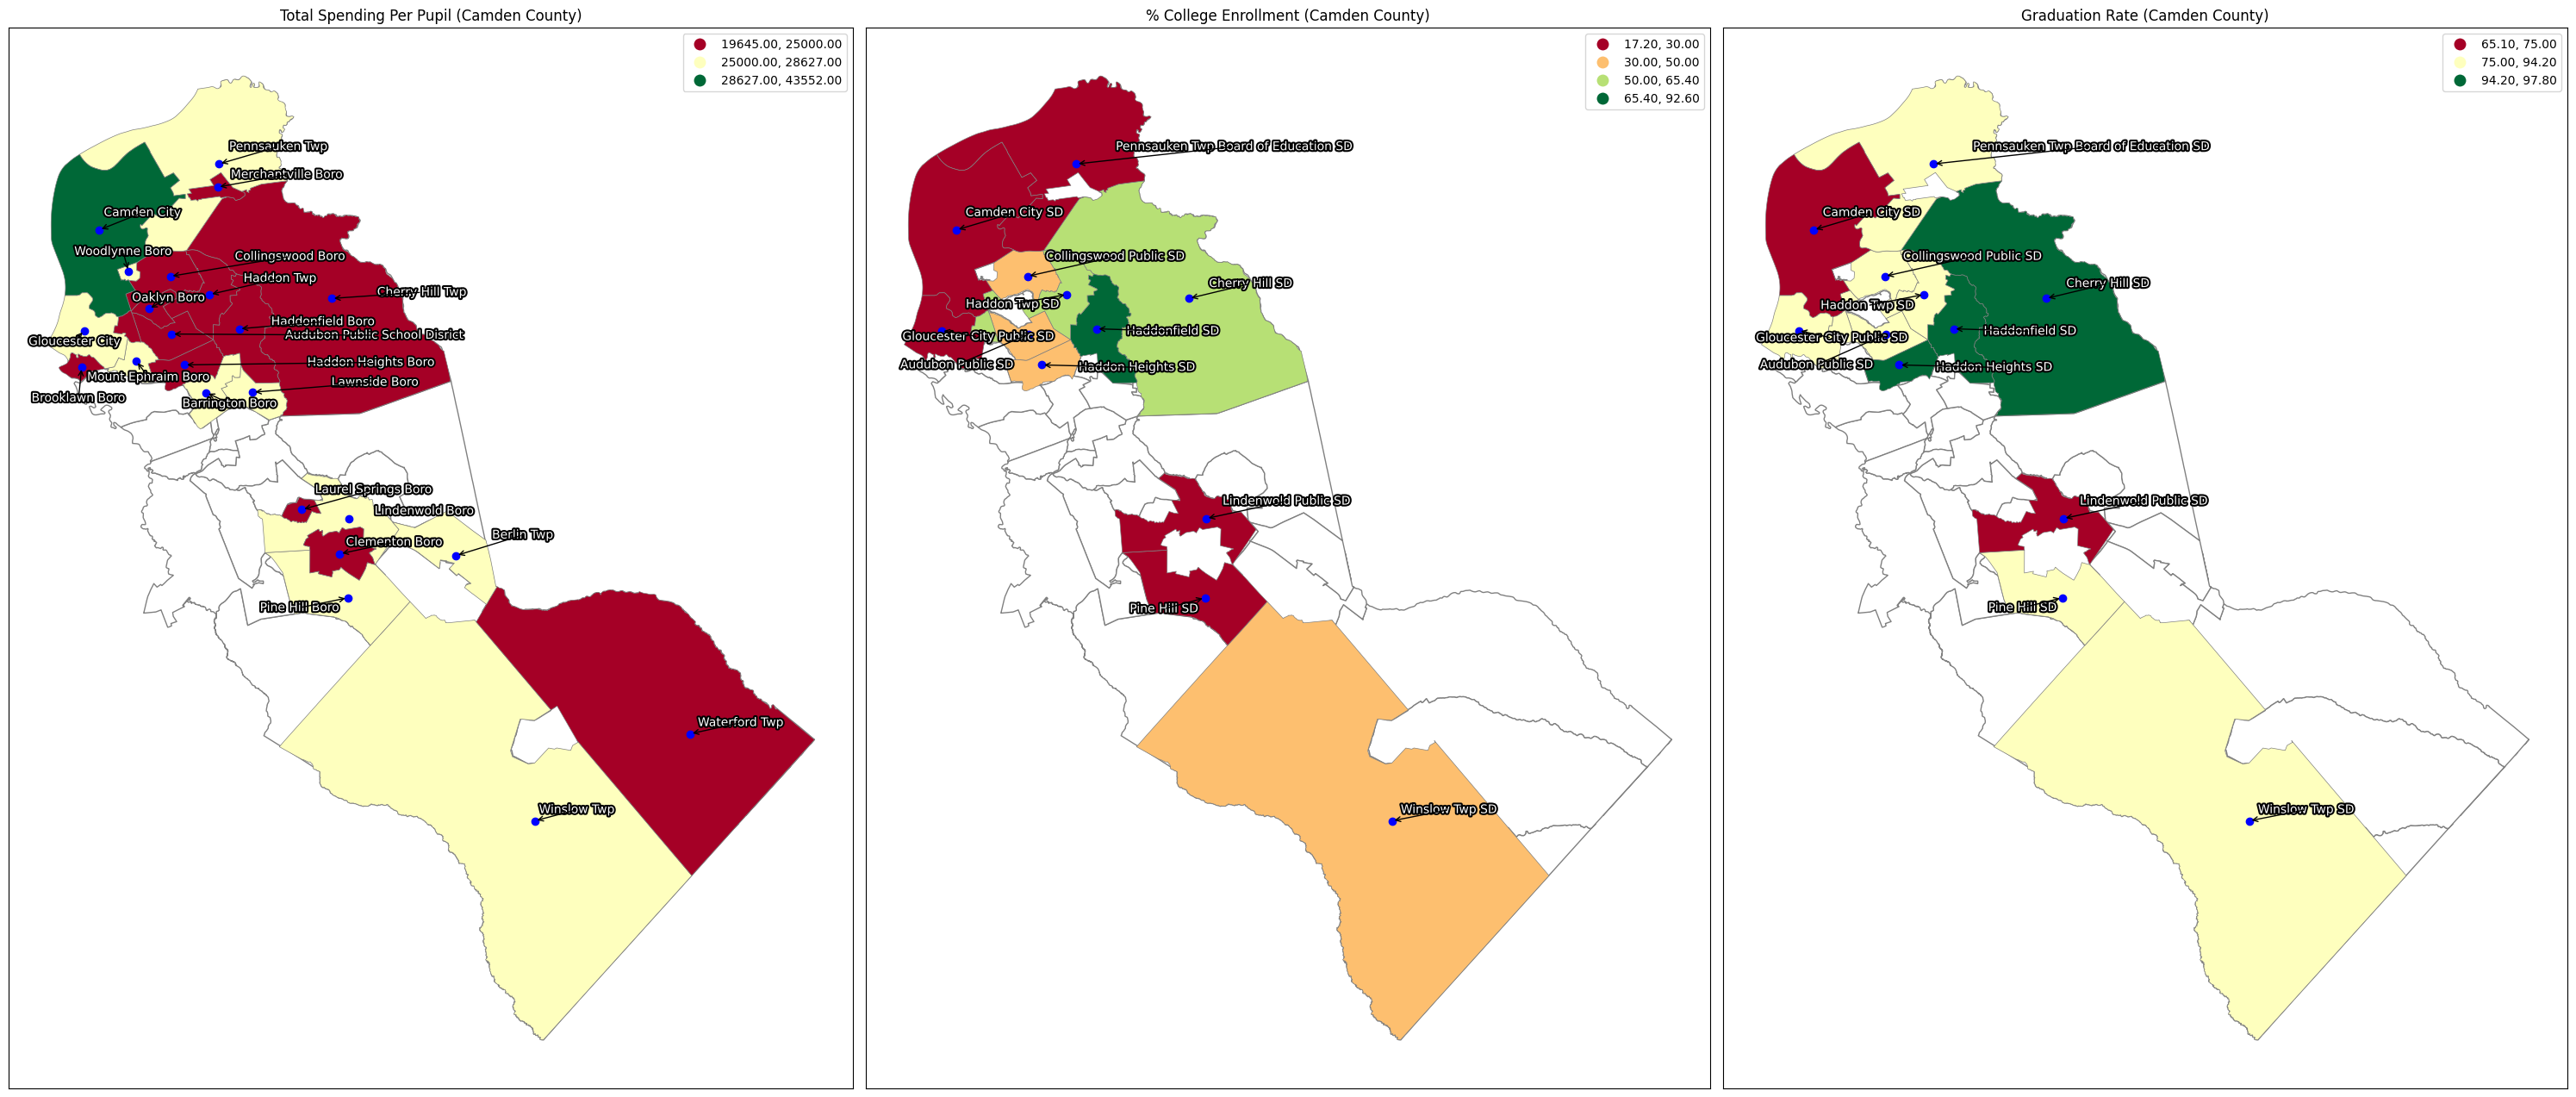

In [84]:
from adjustText import adjust_text
from matplotlib.patheffects import withStroke
import matplotlib.pyplot as plt

# Ensure your GeoDataFrame has a valid geometry and CRS (should already be done)
camden_county = camden_county.to_crs(Camden.crs)  # Ensure CRS matches Camden

# Abbreviate long district names
camden_county['short_name'] = camden_county['district_name'].apply(lambda x: x.replace(' Township', ' Twp').replace(' Borough', ' Boro').replace(' School District', ' SD'))
Cam_county1['short_name'] = Cam_county1['dist_name'].apply(lambda x: x.replace(' Township', ' Twp').replace(' Borough', ' Boro').replace(' School District', ' SD'))
camgradrt1['short_name'] = camgradrt1['dist_name'].apply(lambda x: x.replace(' Township', ' Twp').replace(' Borough', ' Boro').replace(' School District', ' SD'))

# Create subplots for three maps (PPE, College Enrollment, Graduation Rate)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15))

# Path effect for white text with black outline
text_style = [withStroke(linewidth=3, foreground='black')]

# Plot 1: PPE (Per Pupil Expenditure) with reduced leader line lengths
Camden.plot(ax=ax1, color='white', edgecolor='grey', label='Camden Boundary')  # Camden base map
camden_county.plot(ax=ax1, column='PPE', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [25000, 28627]},
                edgecolor='grey', linewidth=0.5, legend=True)

# Create labels with white text, black outline, and shorter leader lines

texts = []
for idx, row in camden_county.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax1.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax1.text(rep_point.x, rep_point.y, short_name, fontsize=10, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle='->', color='black'), expand_text=(1.2, 1.2))

ax1.set_title("Total Spending Per Pupil (Camden County)")
ax1.set_xticks([])
ax1.set_yticks([])

# Plot 2: % College Enrollment with reduced leader line lengths
Camden.plot(ax=ax2, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
Cam_county1.plot(ax=ax2, column='colenr', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [30, 50, 65.4]},
                edgecolor='grey', linewidth=0.5, legend=True)

texts = []
for idx, row in Cam_county1.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax2.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax2.text(rep_point.x, rep_point.y, short_name, fontsize=10, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

adjust_text(texts, ax=ax2, arrowprops=dict(arrowstyle='->', color='black'), expand_text=(1.2, 1.2))


ax2.set_title("% College Enrollment (Camden County)")
ax2.set_xticks([])
ax2.set_yticks([])

# Plot 3: Graduation Rate with reduced leader line lengths
Camden.plot(ax=ax3, color='white', edgecolor='grey', label='Camden Boundary')  # Base map with Camden boundary
camgradrt1.plot(ax=ax3, column='gradrate', cmap='RdYlGn',
                scheme='user_defined', classification_kwds={'bins': [75,94.2]},
                edgecolor='grey', linewidth=0.5, legend=True)

texts = []
for idx, row in camgradrt1.iterrows():
    rep_point = row.geometry_x.representative_point()
    ax3.plot(rep_point.x, rep_point.y, 'bo')
    short_name = row['short_name']
    texts.append(ax3.text(rep_point.x, rep_point.y, short_name, fontsize=10, ha='center', color='white',
                          path_effects=text_style))  # White text with black outline

adjust_text(texts, ax=ax3, arrowprops=dict(arrowstyle='->', color='black'), expand_text=(1.2, 1.2))


ax3.set_title("Graduation Rate (Camden County)")
ax3.set_xticks([])
ax3.set_yticks([])

# Adjust layout for better readability
plt.tight_layout()

# Show the combined maps
plt.show();



### Graduation Rate - Scatter Plot
* Camden City School District stands out for spending the most and having the poorest academic outcomes. Even after the state took over in 2013, what could be responsible? Could the unequal distribution of resources among the 19 schools under its jurisdiction be the cause? Or how effective is the allocation of funds—either on student support services, teacher training and retention, or on non-academic, administrative, and infrastructural growth?


In [255]:
fig = px.scatter(camgradrt1, x="PPE", y="gradrate", color="MedInc",
                 hover_data=['dist_name'],
                 labels={"PPE": "Total Spending Per Pupil", "gradrate":
                         "Graduation Rate", "MedInc": "Median Household Income"},
                 width=1000, height=600)

# Show the plot
fig.show()

* Given the high percentage of economically disadvantaged students the Lindenwold Public School District serves, one could recommend spending more to improve the outcome of their students. While increasing spending would have been the foremost suggestion, other evidence would invalidate it, given the lack of correlation between increased spending and improved academic outcomes.

In [87]:
fig = px.scatter(camgradrt1, x="PPE", y="gradrate", color="econ_dis",
                 hover_data=['dist_name'],
                 labels={"PPE": "Total Spending Per Pupil", "gradrate":
                         "Graduation Rate", "econ_dis": "% Economically Disadvantaged"},
                 width=1000, height=600)

# Show the plot
fig.show()

## % College Enrollment - Scatter Plot

* While four schools have graduation rates exceeding 90%, it's interesting to note that only Haddonfield School District matches this percentage in terms of college enrollment (4 years). Most schools have less than 50%.

In [256]:
fig = px.scatter(Cam_county1, x="PPE", y="colenr", color="MedInc",
                 hover_data=['dist_name'],
                 labels={"PPE": "Total Spending Per Pupil", "colenr":
                         "% College Enrollment (4yrs)", "MedInc": "Median Household Income"},
                 width=1000, height=600)

# Show the plot
fig.show()